# parte della rete ed embedding

montaggio di google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


installazione di FASTTEXT servizio di facebook per effetuare embeding

In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 3.9MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3041650 sha256=cf82c7fe526e6193c88d03804d36d8e116a64e422fab4cdff2ce50705b23f999
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


Download o caricamento del modello per eseguire embeding. 

La parte commentata permette di effettuare il download e ridurre la dimensione dl modelllo 

In [ ]:
import fasttext
import fasttext.util
#fasttext.util.download_model('it', if_exists='ignore')  # English
ft = fasttext.load_model('/content/drive/My Drive/cc.it.100.bin')
#fasttext.util.reduce_model(ft, 100)
"""
  reduce model di FastText utilizza l'algoritmo di PCA --> principal component analysis
  per comprendere come funziona leggere i due link seguenti
  https://lorenzogovoni.com/pca/ link che spiega facilmente l'utilizzo anche con alcuni esempi
  https://en.wikipedia.org/wiki/Principal_component_analysis pagina wikipedia più approfondita
  
"""
ft.get_dimension()

100

esempio di vettore. nel caso specifico ho richiesto la parola ciao

In [ ]:
print(ft.get_word_vector('ciao'))
print(ft.get_nearest_neighbors('goku'))

[-0.07589251 -0.05088861 -0.19878505  0.04662608 -0.2907246   0.17416428
  0.04448112  0.20782743 -0.18147403  0.21923018 -0.03301411 -0.08922778
  0.14900355  0.01399492  0.07895245  0.2481046   0.11365122 -0.14791767
 -0.09492655 -0.10628252  0.08940655  0.01121648 -0.00982088  0.02442779
  0.01610158  0.02529045  0.16045344 -0.1391331   0.1107107  -0.0719149
  0.11491298 -0.04994495  0.06608269  0.08205346 -0.00194466  0.00434074
  0.02265693 -0.02806883  0.1108401   0.16524595  0.31769973  0.10895109
 -0.09574419  0.12524521 -0.04384063  0.02663347  0.02944344  0.08071702
  0.26325563 -0.11798809 -0.07622609 -0.00036645 -0.06327765 -0.00423173
 -0.0680053   0.23879376  0.10287076  0.04634955  0.01270615 -0.02875406
  0.10055192  0.12290709 -0.04342506  0.11151043  0.04494104  0.08620006
  0.02407612 -0.01851998 -0.13379185  0.020483    0.0411669   0.01700271
 -0.08736424 -0.02316015 -0.05478754 -0.00546338 -0.01096503  0.08151208
  0.09743614  0.09075497  0.0627756   0.14068508 -0.

In [ ]:
#ft.save_model('cc.it.100.bin')
#serve solo la prima volta per salvere il modello 

import vari per la creazione della rete 

In [ ]:
# terzo tentativo 
# provo ad allenare a trovare solo il topic intanto

import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import time

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
lista_topic = ['ANIME','MEDICINE-AESTHETICS','AUTO-MOTO','SPORTS','SMOKE','METAL-DETECTING','CELEBRITIES','ENTERTAINMENT','TECHNOLOGY','NATURE','BIKES']
lista_age = ['0-19','20-29','30-39','40-49','50-100']

2.3.0


In [ ]:
# se eegui pulizia usare il path sottostante
#path= "/content/traning_clean.csv"
# se già ho eseguito la pulizia 
path = "/content/drive/My Drive/poggioni/traning_no_vuoti.csv"
df = pd.read_csv(path)
df.head()

,post,topic,age,gender,number word
0,ritorno regno,0,1,0,39
1,benvenuto uomo,0,1,0,16
2,bentornato uomo,0,1,0,17
3,benvenuta donna,0,1,0,17
4,ahahah,0,1,0,9


In [ ]:
df = pd.read_csv(path)
print(df.head(3))
df = df[['post','topic','age','gender']]
print(df.head(3))

              post  topic  age  gender  number word
0    ritorno regno      0    1       0           39
1   benvenuto uomo      0    1       0           16
2  bentornato uomo      0    1       0           17
              post  topic  age  gender
0    ritorno regno      0    1       0
1   benvenuto uomo      0    1       0
2  bentornato uomo      0    1       0


inizio con tutto quello che serve per fare embeding

In [ ]:
RANDOM_STATE = 2020
#TO DO: add review to X and Y

X = df["post"].fillna('').to_list()
X = [str(i) for i in X]
y = df["topic"].fillna('').to_list()
z = df["gender"].fillna('').to_list()
w = df["age"].fillna('').to_list()
# Split train & test
text_train, text_test, y_train, y_test,z_train,z_test,w_train,w_test = train_test_split(X,y,z,w, test_size=0.15, random_state=RANDOM_STATE)
print(text_train[0])
print(text_train[1])

#TO DO : 
# Tokenize and transform to integer index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test  = tokenizer.texts_to_sequences(text_test)


#TO DO: get some statistics
vocab_size = len(tokenizer.word_index) + 1 # adding 1 because of reserverd 0 index
print("vocabulary size: ", vocab_size)

maxlen_train = max( len(x) for x in X_train)
maxlen_test = max( len(x) for x in X_test)

print("maxlen train dataset: ", maxlen_train)
print("maxlen test dataset: ", maxlen_test)

if maxlen_train > maxlen_test:
  massimo = maxlen_train
else:
  massimo = maxlen_test

veltman sinkgraven scudi portiere riserva cavata peccato gol trasferta credo battiamo barca può accadere
collage adoro cosa convince scritta elegant riguarda colorize pelle molto migliorata tonalità effettivamente simile quella rihanna punti luce foto dosato colore maniera diversa magari schiarendolo pochino ultima cosa sembra ancora irreale scurita
vocabulary size:  43518
maxlen train dataset:  4399
maxlen test dataset:  557


In [ ]:
#cella per controllare che lo split sia eseguito bene.
#dai dati raccolti poso confermare che lo split è eseguito bene.
indice = 5000
valore_train=0
valore_test=0
print(X[indice],y[indice],z[indice],w[indice])
#print(text_train)
if X[indice] in text_train:
  valore_train = text_train.index(X[indice])
  print("train")
elif X[indice] in text_test:
  valore_test = text_train.index(X[indice])
  print("test")
else:
  print("c'è un errore")
if valore_train>0:
  print(text_train[valore_train],y_train[valore_train],z_train[valore_train],w_train[valore_train])
else:
  print(text_test[valore_test],y_test[valore_test],z_test[valore_test],w_test[valore_test])

mary giovanni 6 1 3
train
mary giovanni 6 1 3


eseguo il padding del testo perchè per fare embeding ogni parola deve avere la stessa lunghezza 

In [ ]:
print(X_train)
X_train = pad_sequences(X_train, padding = "post", maxlen = massimo)
X_test = pad_sequences(X_test, padding = "post", maxlen = massimo)
print(X_train)

[[20384, 20385, 20386, 1346, 2072, 10504, 296, 239, 1892, 53, 10505, 2528, 32, 7215], [6212, 436, 10, 3211, 507, 20387, 277, 4916, 791, 5, 4452, 3449, 737, 516, 50, 20388, 137, 595, 42, 20389, 207, 648, 1259, 92, 20390, 1579, 816, 10, 58, 16, 13755, 20391], [1347, 791, 917, 1532, 1816, 20392, 3, 1421, 20393, 151, 12, 20394, 20395, 11, 20396, 20397, 2832], [1983], [574], [26, 125, 65, 7216, 651, 146], [129, 3008, 1422, 8488, 13756, 817, 13757], [20398, 88, 575, 3212, 1817, 1123, 5, 20399, 4453, 100, 4454, 20400, 6, 5511, 716, 126, 1423, 668, 13758, 103, 20401, 421, 757, 3, 3212, 1260, 27, 119, 5512, 1308, 980, 13759, 7217, 52, 13760, 871, 231, 61, 378, 7218, 13761, 8489, 26, 387, 3721, 22, 422, 3, 281, 1702, 7219, 1473, 818, 981, 10506, 7220, 422, 143, 3213, 3, 13762, 25, 139, 8, 3, 2387], [41, 379, 100, 6213, 1580, 1184, 83, 620], [20402, 85, 15, 58], [13763, 20403, 20404], [523, 8, 26, 2529, 235, 39, 8490, 703, 1533, 33, 637, 850, 122, 2073, 20405, 1818, 55, 257, 8491, 20406, 27, 1309

creo un embeding matrix sulla base del dizionario precedentemnete creato

In [ ]:
#TO DO : create embedding_matrix using the embedding_index dictionary and the tokenizer dictionary

embeddings_matrix = np.zeros((vocab_size,100))

for word, index in tokenizer.word_index.items():
  if index > vocab_size-1:
    break
  else:
    embedding_vector = ft.get_word_vector(word)
    if embedding_vector is not None:
        embeddings_matrix[index] = embedding_vector


creo la rete per il **TOPIC**

In [ ]:
#https://keras.io/examples/nlp/text_classification_from_scratch/
embedding_dim = 100

model_dense_topic = tf.keras.Sequential()

model_dense_topic.add(tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = massimo,weights = [embeddings_matrix], trainable = False)) # 3d (batch_size, maxlen, dim) ho tre dimensioni in questo caso
#model_dense_topic.add(tf.keras.layers.Flatten())
model_dense_topic.add(tf.keras.layers.Dropout(0.4))
model_dense_topic.add(tf.keras.layers.Conv1D(256,7,padding="valid",activation="relu"))
model_dense_topic.add(tf.keras.layers.GlobalMaxPooling1D())

model_dense_topic.add(tf.keras.layers.Dense(64, activation = "relu"))
model_dense_topic.add(tf.keras.layers.Dropout(0.2))
model_dense_topic.add(tf.keras.layers.Dense(len(lista_topic), activation = "softmax"))
from tensorflow import keras
#https://keras.io/api/losses/
#loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,name='sparse_categorical_crossentropy')
# la loss function indicata con loss 
model_dense_topic.compile(optimizer = "adam", loss =loss_fn, metrics = ["accuracy"] )

model_dense_topic.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4399, 100)         4351800   
_________________________________________________________________
dropout (Dropout)            (None, 4399, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 4393, 256)         179456    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                7

In [ ]:
"""
per mandare tante epoche usare il seguente script per evitare la disconessione

function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,70000)
"""

alleno la rete del topic 

In [ ]:
history = model_dense_topic.fit(np.array(X_train), np.array(y_train),epochs=50, verbose=True,validation_data=(np.array(X_test),np.array(y_test)),batch_size=256)


Epoch 1/50
72/72 [==============================] - 109s 2s/step - loss: 2.2779 - accuracy: 0.2693 - val_loss: 2.2152 - val_accuracy: 0.3694
Epoch 2/50
72/72 [==============================] - 107s 1s/step - loss: 2.1628 - accuracy: 0.3933 - val_loss: 2.1366 - val_accuracy: 0.4157
Epoch 3/50
72/72 [==============================] - 107s 1s/step - loss: 2.1124 - accuracy: 0.4372 - val_loss: 2.1207 - val_accuracy: 0.4204
Epoch 4/50
72/72 [==============================] - 108s 1s/step - loss: 2.1000 - accuracy: 0.4442 - val_loss: 2.1197 - val_accuracy: 0.4216
Epoch 5/50
72/72 [==============================] - 107s 1s/step - loss: 2.0899 - accuracy: 0.4545 - val_loss: 2.1100 - val_accuracy: 0.4312
Epoch 6/50
72/72 [==============================] - 107s 1s/step - loss: 2.0853 - accuracy: 0.4577 - val_loss: 2.1091 - val_accuracy: 0.4278
Epoch 7/50
72/72 [==============================] - 109s 2s/step - loss: 2.0826 - accuracy: 0.4608 - val_loss: 2.1037 - val_accuracy: 0.4330
Epoch 8/50
72

"\n con mille epoche e la rete precedente avevamo all'epoca 300 questo risultato \n 101s 657ms/step - loss: 2.0639 - accuracy: 0.4831 - val_loss: 2.1810 - val_accuracy: 0.3700\n"

In [ ]:
loss, accuracy = model_dense_topic.evaluate(np.array(X_test), np.array(y_test), verbose = 1 )

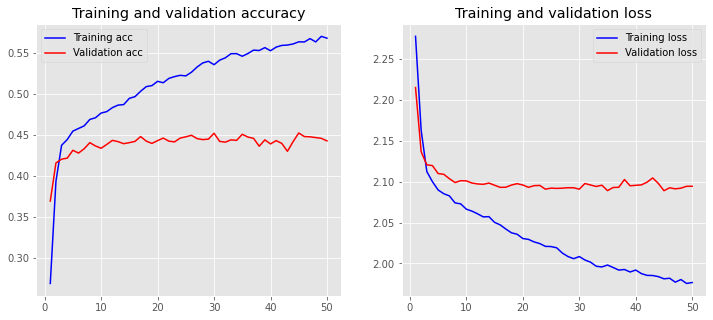

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history)

creo la rete del **GENDER** 

In [ ]:
#TO DO:
# Define MLP architecture
embedding_dim = 100

model_dense_gender = tf.keras.Sequential()
model_dense_gender.add(tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = massimo,weights = [embeddings_matrix], trainable = False)) # 3d (batch_size, maxlen, dim) ho tre dimensioni in questo caso

model_dense_gender.add(tf.keras.layers.Dropout(0.5))
model_dense_gender.add(tf.keras.layers.Dense(256, activation = "relu")) #questo non è il primo livello della MLP
model_dense_gender.add(tf.keras.layers.Dropout(0.5))
model_dense_gender.add(tf.keras.layers.Dense(128, activation = "relu"))
model_dense_gender.add(tf.keras.layers.Dropout(0.4))
#potrebbe essere necessario aggiungere un livello di droupout (fare prima qualche esperimento)
model_dense_gender.add(tf.keras.layers.Dense(64, activation = "relu"))
model_dense_gender.add(tf.keras.layers.Dropout(0.3))
model_dense_gender.add(tf.keras.layers.Dense(32, activation = "relu"))
#il numero di neuroni dipende da quante classi bisogna prevedere
#nel caso in questione devo prevedere len(lista_topic)
#model_dense.add(tf.keras.layers.Dense(len(lista_topic), activation = "softmax"))
model_dense_gender.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
#compilare il modello  definendo alcuni parametri per l'allenamento
# optimaizer
# metrics 
from tensorflow import keras
#https://keras.io/api/losses/
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# la loss function indicata con loss 
model_dense_gender.compile(optimizer = "adam", loss =loss_fn, metrics = ["accuracy"] )

model_dense_gender.summary()

alleno la rete per riconoscere il gender

In [ ]:
history_gender = model_dense_gender.fit(np.array(X_train), np.array(z_train),epochs=30, verbose=True,validation_data=(np.array(X_test),np.array(z_test)),batch_size=128)

In [ ]:
loss, accuracy = model_dense_topic.evaluate(np.array(X_test), np.array(z_test), verbose = 1 )

In [ ]:
plt.style.use('ggplot')

def plot_history(history_gender):
    acc = history_gender.history['accuracy']
    val_acc = history_gender.history['val_accuracy']
    loss = history_gender.history['loss']
    val_loss = history_gender.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history_gender)

In [ ]:
embedding_dim = 100

model_dense_age = tf.keras.Sequential()

model_dense_age.add(tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = massimo,weights = [embeddings_matrix], trainable = False)) # 3d (batch_size, maxlen, dim) ho tre dimensioni in questo caso
model_dense_age.add(tf.keras.layers.Flatten())
model_dense_age.add(tf.keras.layers.Dense(128, activation = "softsign"))
model_dense_age.add(tf.keras.layers.Dense(128, activation = "softplus"))
model_dense_age.add(tf.keras.layers.Dense(128, activation = "softmax"))
model_dense_age.add(tf.keras.layers.BatchNormalization())
model_dense_age.add(tf.keras.layers.Dropout(0.2))
model_dense_age.add(tf.keras.layers.Dense(64, activation = "softmax"))
model_dense_age.add(tf.keras.layers.BatchNormalization())
model_dense_age.add(tf.keras.layers.Dropout(0.5))
model_dense_age.add(tf.keras.layers.Dense(32, activation = "softmax"))
model_dense_age.add(tf.keras.layers.BatchNormalization())
model_dense_age.add(tf.keras.layers.Dense(len(lista_age), activation = "softmax")) #softmax no in mezzo relu
model_dense_age.add(tf.keras.layers.BatchNormalization())
from tensorflow import keras
#https://keras.io/api/losses/
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# la loss function indicata con loss 
model_dense_age.compile(optimizer = "adam", loss =loss_fn, metrics = ["accuracy"] )

model_dense_age.summary()

In [ ]:
history_age = model_dense_age.fit(np.array(X_train), np.array(w_train),epochs=100, verbose=True,validation_data=(np.array(X_test),np.array(w_test)),batch_size=256)

In [ ]:
#predizione di una frase 
x_sample = input("inserisci il tweet da predire: ")
print(x_sample)
x_sample=[x_sample]
print(x_sample)
x_sample_token = tokenizer.texts_to_sequences(x_sample)
print(x_sample_token)

x_sample_token = pad_sequences(x_sample_token, padding = "post", maxlen = massimo)
print(x_sample_token)

print("l'età della predizione è: ")
eta_prediction = model_dense_age.predict_classes(x_sample_token)
print(eta_prediction)
print(lista_age[int(eta_prediction)])
print("il gender della predizione è: ")
gender_prediction = model_dense_gender.predict_classes(x_sample_token)
print(gender_prediction)
if int(gender_prediction)==0:
  print("M")
elif int(gender_prediction)==1:
  print("F")
else:
  print("errore")
print("il topic della predizione è: ")
topic_prediction = model_dense_topic.predict_classes(x_sample_token)
print(topic_prediction)
print(lista_topic[int(topic_prediction)])

SALVATAGGIO DELL'ALLENAMENTO 

In [ ]:
!pip install pyyaml h5py  

In [ ]:
import os

print(tf.version.VERSION)

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)



# Save the weights using the `checkpoint_path` format
model_dense_topic.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
history = model_dense_topic.fit(np.array(X_train), np.array(y_train), epochs=50, callbacks=[cp_callback],validation_data=(np.array(X_test), np.array(y_test)),verbose=0)
